# Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import json
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, make_scorer
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from scipy import stats

# Read in the data stored locally

In [4]:
# Read in the first 10 LOCAL AREA URL'S 
# The string needs to be modified to JSON can  convert it into a python dict
with open("slurm-houses1A.out ", encoding="utf-8") as f:
    contents = f.read()
    # Remove the progress bars produced by the OCR
    start = contents.find("{")
    data10A = contents[start:-1]
    data10A = data10A.replace("False", "false")
    data10A = data10A.replace("True", "true")
    data10A = data10A.replace("None", "null")
    data10A = data10A.replace("nan", "null")
    data10A = data10A.replace("'", '"')
    
with open("slurm-houses1B.out ", encoding="utf-8") as f:
    contents1 = f.read()
    # Remove the progress bars produced by the OCR
    start = contents1.find("{")
    data10B = contents1[start:-1]
    data10B = data10B.replace("False", "false")
    data10B = data10B.replace("True", "true")
    data10B = data10B.replace("None", "null")
    data10B = data10B.replace("nan", "null")
    data10B = data10B.replace("'", '"')

data10AB = data10A[:-1]+', '+data10B[1:]
houses10AB = json.loads(data10AB)
len(houses10AB)

19111

In [5]:
# First 100 LOCAL AREA URL's
# Format the string so JSON can convert it into a python dict
with open("slurm-100A.out ", encoding="utf-8") as f:
    contents = f.read()
    # Remove the progress bars produced by the OCR and remove the error at the end
    start = contents.find("{")
    data1A = contents[start:-222]
    data1A = data1A.replace("False", "false")
    data1A = data1A.replace("True", "true")
    data1A = data1A.replace("None", "null")
    data1A = data1A.replace("nan", "null")
    data1A = data1A.replace("'", '"')

with open("slurm-100B.out ", encoding="utf-8") as f:
    contents1 = f.read()
    # Remove the progress bars produced by the OCR
    start = contents1.find("{")
    data1B = contents1[start:-190]
    data1B = data1B.replace("False", "false")
    data1B = data1B.replace("True", "true")
    data1B = data1B.replace("None", "null")
    data1B = data1B.replace("nan", "null")
    data1B = data1B.replace("'", '"')
    

data1AB = data1A[:-1]+', '+data1B[1:]
houses100AB = json.loads(data1AB)

In [6]:
# 100-200 Local Area URL's
with open("slurm-100_200A.out ", encoding="utf-8") as f:
    contents2A = f.read()
    # Remove the progress bars produced by the OCR
    start = contents2A.find("{")
    data2A = contents2A[start:]
    data2A = data2A.replace("False", "false")
    data2A = data2A.replace("True", "true")
    data2A = data2A.replace("None", "null")
    data2A = data2A.replace("nan", "null")
    data2A = data2A.replace("inf", "null")
    data2A = data2A.replace("'", '"')
    data2A = data2A.replace("\n", '')
houses100_200A = json.loads(data2A) 

with open("slurm-100_200B.out ", encoding="utf-8") as f:
    contents2B = f.read()
    # Remove the progress bars produced by the OCR
    start = contents2B.find("{")
    data2B = contents2B[start:-351]
    data2B = data2B.replace("False", "false")
    data2B = data2B.replace("True", "true")
    data2B = data2B.replace("None", "null")
    data2B = data2B.replace("nan", "null")
    data2B = data2B.replace("inf", "null")
    data2B = data2B.replace("'", '"')
houses200B = json.loads(data2B)

data100_200AB = data2A[:-1]+', '+data2B[1:]
houses200AB = json.loads(data100_200AB)
len(houses200AB)

63694

In [8]:
# # Putting together the first 200 local url's of houses
# data1AB_2AB = data1A[:-1]+', '+data1B[1:-1]+', '+data2A[1:-1]+', '+data2B[1:]
# houses0_200AB = json.loads(data1AB_2AB)
# len(houses0_200AB)

104191

In [7]:
# All of these output files have already been modified so the json.loads() can read the string into a python dictionary

with open("slurm-200_300Aclean.out") as f:
    data300A = f.read()
    # Had an issue problem with this data so this part is commmented out
    
with open("slurm-200_300Bclean.out") as f:
    data300B = f.read()
houses300B = json.loads(data300B)
    
with open("slurm-300_400Aclean.out") as f:
    data400A = f.read()
houses400A = json.loads(data400A)
    
with open("slurm-300_400Bclean.out") as f:
    data400B = f.read()
houses400B = json.loads(data400B)
    
with open("slurm-400_500Aclean.out") as f:
    data500A = f.read()
houses500A = json.loads(data500A)
    
with open("slurm-400_500Bclean.out") as f:
    data500B = f.read()
houses500B = json.loads(data500B)
    
with open("slurm-500_600Aclean.out") as f:
    data600A = f.read()
    data600A = data600A.replace("inf", "null")
houses600A = json.loads(data600A)
    
with open("slurm-500_600Bclean.out") as f:
    data600B = f.read()
houses600B = json.loads(data600B)

with open("slurm-600_endAclean.out") as f:
    data700A = f.read()
houses700A = json.loads(data700A)
    
with open("slurm-600_endBclean.out") as f:
    data700B = f.read()
houses700B = json.loads(data700B)
    

In [ ]:
# This code puts the dictionaries of data into a single dictionary
from itertools import chain
complete_dataA = dict(chain.from_iterable(d.items() for d in (houses100AB, houses200AB, houses300B, houses400A, houses400B, houses500A, houses500B, houses600A, houses600B, houses700A, houses700B)))

In [ ]:
############################################################################################################

# Obtain the data in a Pandas DataFrame

In [9]:
# Here is where we iterate over our data and store it in a dictionary in a format that can be read into a pandas 
# dataframe

properties = {}
index = 0
for h, i in complete_dataA.items():
    house_data = []
    
    # Extract the first half of the postcode (the postcode area)
    postcode = h[-8:]
    if postcode[0] == " ":
        postcode = h[-7:]
    postcode_area = postcode.split(" ")[0]
    if postcode_area == 'n':
        postcode_area = postcode.split(" ")[1]
    house_data.append(postcode_area)


    # Longitude and Latitude 
    if 'latitude' and 'longitude' in i.keys():
        house_data.append(i['latitude'])
        house_data.append(i['longitude'])
    else:
        house_data.append("Na")
        house_data.append("Na")
    
    # Property type
    house_data.append(i['property_type'])
    
    
    # Convert the data into the necessary string format
    date_obj = datetime.datetime.strptime(i['date'], "%d %b %Y")
    date_str = date_obj.strftime("%Y-%m-%d")
    house_data.append(date_str)
    
    # Distances to the nearest train stations
    if 'station_proximities' in i.keys() and i['station_proximities'] != {}:
        station_distance = min(i['station_proximities'].values())
        house_data.append(station_distance)
    else:
        house_data.append("NA")
        
        
    if 'property_size' not in i.keys():
        house_data.append("NA")
    elif i['property_size'] == {} or i['property_size'] == 'Na' or i["property_size"] == None:
        house_data.append("NA")
    else:
        # This returnS the sq foot size of the property
        house_data.append(i["property_size"])
    
    # Bedrooms and bathrooms data   
    if "bedrooms" not in i.keys():
        house_data.append("NA")
    elif i['bedrooms'] == None or i['bedrooms'] == '':
        house_data.append("NA")
    else:
        house_data.append(i["bedrooms"])
        
    if 'bathrooms' not in i.keys():
        house_data.append("NA")
    elif i['bathrooms'] == None or i['bathrooms'] == '':
        house_data.append("NA")
    else:
        house_data.append(i["bathrooms"])
        
        
    # New build
    if 'new_build' not in i.keys():
        house_data.append("NA")
    elif i['new_build'] == '' or i["new_build"] == None:
        house_data.append("NA")
    else:
        if i["new_build"]:
            house_data.append("New_Build")
        else:
            house_data.append("Old_Build")
    # Nearest outstanding school
    
    if 'nearest_outstanding_school' not in i.keys():
        house_data.append("NA")
    else:
        house_data.append(i["nearest_outstanding_school"])
    
    # This is for observing the amount of properties that have a floorplan, so I can assess the amount of missing data 
    # and the quality of the OCR program to extract the property size from the floorplans
    if 'floorplan_url' in i.keys():
        house_data.append("Yes")
    else:
        house_data.append("NA")
        
    # Remove some of the unnecessary characters in the price string
    price = i["price"]
    if type(price) != int:    
        if "Â" in price:
            price = price.replace("Â", "")
        if "£" in price:
            price = price.replace("£", "")
        if "," in price:
            price = price.replace(",", "")
        price = int(price)
        house_data.append(price)
    elif type(price) == int:
        house_data.append(price)
    
    # Add all of this data for a property into the value of a key in our properties dictionary
        
    properties[h] = house_data
    index += 1

In [10]:
# Store the dictionary in a DataFrame
properties_df = pd.DataFrame(properties)
properties_df = properties_df.T
properties_df.columns = ["Postcode_Area", "Latitude", "Longitude", "Property Type","Sold_Date", "Closest Station", "Size", "Bedrooms", "Bathrooms", "New Build", "Nearest OS", "Floorplan?", "Price"]
# Set the null/na values to numpy  NaN values
properties_df = properties_df.replace("NA", np.NaN)
properties_df = properties_df.replace("Na", np.NaN)
properties_df = properties_df.replace("na", np.NaN)

In [11]:
# Set the dummy variables
property_type_dummies = pd.get_dummies(properties_df['Property Type'])
build_type_dummies = pd.get_dummies(properties_df['New Build'])
# Add these dummies to the dataframe, using the index (addresses)
properties_df = pd.merge(properties_df, property_type_dummies, left_index=True, right_index=True)
properties_df = pd.merge(properties_df, build_type_dummies, left_index=True, right_index=True)

In [12]:
# Remove the old columns which the dummy variables have replaced
del properties_df['Property Type']
del properties_df['New Build']

In [13]:
properties_df

,Postcode_Area,Latitude,Longitude,Sold_Date,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Floorplan?,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build
"33, Westminster Gardens, Barking, Greater London IG11 0BJ",IG11,51.528289,0.089402,2022-04-14,0.832241,850,3.0,2.0,4.219735,Yes,390000,0,0,0,1,0,1
"94, Bastable Avenue, Barking, Greater London IG11 0LF",IG11,51.527760,0.098680,2022-04-08,0.740046,833,2.0,1.0,3.817960,Yes,260000,0,1,0,0,0,1
"Flat 29, St Aidans Court, Blessing Way, Barking, Greater London IG11 0XH",IG11,51.526880,0.117380,2022-04-04,1.009110,NaN,2.0,1.0,3.237496,Yes,200000,0,1,0,0,0,1
"3, Chilworth Place, Barking, Greater London IG11 0FL",IG11,51.533300,0.083300,2022-03-25,NaN,NaN,NaN,NaN,3.447356,NaN,302000,0,0,0,1,0,0
"Flat 6, Victory Court, Atlantis Close, Barking, Greater London IG11 0GP",IG11,51.522350,0.111355,2022-03-11,1.183725,602.784,2.0,1.0,3.863198,Yes,248000,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Flat 4, 10 - 11, Hobury Street, London, Greater London SW10 0JB",SW10,51.487600,-0.169400,2010-03-29,NaN,NaN,NaN,NaN,2.123462,NaN,785000,0,1,0,0,0,0
"Flat 6, Clark House, Coleridge Gardens, London, Greater London SW10 0RS",SW10,51.480710,-0.186050,2010-03-26,0.386292,NaN,1.0,NaN,2.114001,NaN,695000,0,1,0,0,0,1
"26, Stadium Street, London, Greater London SW10 0PT",SW10,51.479190,-0.181210,2010-03-19,0.300087,2119,4.0,NaN,2.380126,Yes,1530000,0,0,0,1,0,1
"Flat C, 39 - 40, Gertrude Street, London, Greater London SW10 0JG",SW10,51.487600,-0.169400,2010-03-10,NaN,NaN,NaN,NaN,2.123462,NaN,925000,0,1,0,0,0,0


In [14]:
# Let's view the amount of missing data
properties_df.isnull().sum(axis = 0), len(properties_df)

(Postcode_Area           0
 Latitude              652
 Longitude             652
 Sold_Date               0
 Closest Station    138929
 Size               244212
 Bedrooms           141992
 Bathrooms          203606
 Nearest OS          37138
 Floorplan?         192508
 Price                   0
 Detached                0
 Flat                    0
 Semi-Detached           0
 Terraced                0
 New_Build               0
 Old_Build               0
 dtype: int64,
 373930)

In [15]:
del properties_df['Sold_Date']
del properties_df['Floorplan?']

In [16]:
# Code for generating the local similar prices feature (using the median of properties in the same postcode area, with
# the same number of bedrooms, and the same property type). 
# Produce a grouped dataframe on these attributes
postcode_similar_houses = properties_df.groupby(["Postcode_Area", "Detached", "Flat", "Semi-Detached", "Terraced", "Bedrooms"])

# Generate the medians for each group
local_similar_prices = postcode_similar_houses['Price'].median()

# Create a column to put the local similar prices column in
properties_df['Local_Similar_Prices'] = np.NaN

# Get the relevant medians into the local similar prices column
for i in properties_df[:].iterrows():
    try:
        local_similar_price = local_similar_prices[i[1][0], i[1][9], i[1][10], i[1][11], i[1][12],  i[1][5]]
        properties_df.loc[i[0], "Local_Similar_Prices"] = local_similar_price
    except KeyError:
        continue

In [17]:
properties_df

,Postcode_Area,Latitude,Longitude,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build,Local_Similar_Prices
"33, Westminster Gardens, Barking, Greater London IG11 0BJ",IG11,51.528289,0.089402,0.832241,850,3.0,2.0,4.219735,390000,0,0,0,1,0,1,375000.0
"94, Bastable Avenue, Barking, Greater London IG11 0LF",IG11,51.527760,0.098680,0.740046,833,2.0,1.0,3.817960,260000,0,1,0,0,0,1,224995.0
"Flat 29, St Aidans Court, Blessing Way, Barking, Greater London IG11 0XH",IG11,51.526880,0.117380,1.009110,NaN,2.0,1.0,3.237496,200000,0,1,0,0,0,1,224995.0
"3, Chilworth Place, Barking, Greater London IG11 0FL",IG11,51.533300,0.083300,NaN,NaN,NaN,NaN,3.447356,302000,0,0,0,1,0,0,NaN
"Flat 6, Victory Court, Atlantis Close, Barking, Greater London IG11 0GP",IG11,51.522350,0.111355,1.183725,602.784,2.0,1.0,3.863198,248000,0,1,0,0,0,1,224995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Flat 4, 10 - 11, Hobury Street, London, Greater London SW10 0JB",SW10,51.487600,-0.169400,NaN,NaN,NaN,NaN,2.123462,785000,0,1,0,0,0,0,NaN
"Flat 6, Clark House, Coleridge Gardens, London, Greater London SW10 0RS",SW10,51.480710,-0.186050,0.386292,NaN,1.0,NaN,2.114001,695000,0,1,0,0,0,1,600000.0
"26, Stadium Street, London, Greater London SW10 0PT",SW10,51.479190,-0.181210,0.300087,2119,4.0,NaN,2.380126,1530000,0,0,0,1,0,1,2762500.0
"Flat C, 39 - 40, Gertrude Street, London, Greater London SW10 0JG",SW10,51.487600,-0.169400,NaN,NaN,NaN,NaN,2.123462,925000,0,1,0,0,0,0,NaN


# Create a new DataFrame, drop the NaN values, and perform the first MLR with the Postcode Area Local Similar Prices - This is one of the model which was performed with the entire dataset

In [18]:
# Create a new dataframe which we're going to work with the perfrom this regression
prop_df = properties_df[:]
# Remove the columns which we don't want in the regression
del prop_df['Postcode_Area']
del prop_df['Latitude']
del prop_df['Longitude']
# Here we've dropped all of the rows without all of the data for the prop_df
prop_df = prop_df.dropna()

# Coerce the size series into the correct datatype
prop_df['Size'] = pd.to_numeric(prop_df['Size'])

In [19]:
# Shuffle the rows of the dataframe
prop_df = prop_df.sample(frac=1)
prop_df

,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build,Local_Similar_Prices
"Flat 7, Bowen Court, Highbury Grange, London, Greater London N5 2PE",0.366998,409.03200,1.0,1.0,1.830718,360000,0,1,0,0,0,1,453750.0
"64, Combe Avenue, London, Greater London SE3 7PY",0.471565,888.00000,3.0,1.0,1.709418,600000,0,0,0,1,0,1,565000.0
"17, Averil Grove, London, Greater London SW16 3ET",0.785761,688.00000,2.0,1.0,4.817425,307400,0,1,0,0,0,1,375000.0
"38, Cleaver Street, London, Greater London SE11 4DP",0.183256,556.00000,3.0,2.0,0.842368,1285000,0,0,0,1,0,1,1030000.0
"46, Squirrels Heath Lane, Hornchurch, Greater London RM11 2EA",0.267105,1453.00000,4.0,2.0,0.449803,527500,1,0,0,0,0,1,720000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"44a, Hopefield Avenue, London, Greater London NW6 6LH",0.187345,1001.05200,3.0,1.0,0.339258,802000,0,1,0,0,0,1,720000.0
"34, Clandon Road, Ilford, Greater London IG3 8BB",0.117108,206.00000,3.0,1.0,2.744451,475000,0,0,0,1,0,1,402500.0
"175, Abbeyfields Close, London, Greater London NW10 7EJ",0.443018,934.00000,2.0,1.0,2.669968,360000,0,1,0,0,0,1,360000.0
"289a, Cann Hall Road, London, Greater London E11 3NL",0.569284,688.00000,2.0,1.0,3.736335,386975,0,1,0,0,0,1,356000.0


In [20]:
# Perform the regression (THIS IS WITHOUT NORMALISING THE FEATURES USING Z SCORE)
x = prop_df.drop(['Price'], axis=1).values
y = prop_df['Price'].values

# split the data set into a training and testing set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Training the model 
ml = LinearRegression()
ml.fit(x_train,y_train)
# Predict the test set results
y_pred = ml.predict(x_test)
# evaluate the model 
print(r2_score(y_test, y_pred))

-1.1266454813529947e-07
316835.4195147816


In [21]:
r_scorer = make_scorer(r2_score)
# 3-FOLD CROSS VALIDATION 
r_scores = cross_val_score(ml, x, y, cv=3, scoring=r_scorer)
print(r_scores, r_scores.mean())

[-2.20217458e-007 -9.70118875e-005 -5.61602970e+158] -1.8720099004497071e+158


In [22]:
def adj_rsq(r2_score, dataframe):
    """Returns the adjusted R-squared"""
    n = len(dataframe)
    k = len(dataframe.columns)
    return 1 - ((1-r2_score)*(n-1)/(n-k-1))

In [23]:
adj_rsq(r_scores.mean(), prop_df)

-1.8722671642738209e+158

In [24]:
prop_df.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'New_Build',
       'Old_Build', 'Local_Similar_Prices'],
      dtype='object')

In [32]:
# Normalise the rows using the Z-score technique

norm_data = pd.DataFrame()

for column in prop_df.columns:
    zscores = stats.zscore(prop_df[column].values)
    norm_data[column] = zscores

In [33]:
norm_data = norm_data.sample(frac=1)
norm_data

,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build,Local_Similar_Prices
80916,3.414933,-0.003251,0.065768,0.771607,1.927586,0.360248,3.630156,-0.650307,-0.545242,-0.821775,-0.056211,0.056211,-0.007434
31395,0.633430,-0.003251,-0.834976,-0.638319,0.802614,-0.699976,-0.275470,-0.650307,1.834047,-0.821775,-0.056211,0.056211,-0.675254
25052,-1.061723,-0.003251,-0.834976,-0.638319,-0.168683,-0.034050,-0.275470,-0.650307,-0.545242,1.216878,-0.056211,0.056211,-0.274562
76589,-0.639763,-0.003251,-0.834976,-0.638319,-0.675609,-0.498446,-0.275470,1.537735,-0.545242,-0.821775,-0.056211,0.056211,0.015683
87055,-0.475091,-0.003251,-0.834976,-0.638319,-0.565137,-0.682451,-0.275470,1.537735,-0.545242,-0.821775,-0.056211,0.056211,-0.510867
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73751,1.034175,-0.003251,0.065768,-0.638319,-0.019822,-0.331964,-0.275470,-0.650307,-0.545242,1.216878,-0.056211,0.056211,-0.459497
69056,-1.192166,-0.003251,-1.735720,-0.638319,0.669234,-0.699976,-0.275470,1.537735,-0.545242,-0.821775,-0.056211,0.056211,-0.706179
41550,-0.019538,-0.003251,-0.834976,-0.638319,-1.021067,-0.545761,-0.275470,1.537735,-0.545242,-0.821775,-0.056211,0.056211,-0.500593
71730,1.805468,-0.003251,0.065768,-0.638319,0.656425,-0.251352,-0.275470,-0.650307,1.834047,-0.821775,-0.056211,0.056211,-0.492374


In [34]:
x_norm = norm_data.drop(['Price'], axis=1).values
y_norm = norm_data['Price'].values

# split the data set into a training and testing set
xnorm_train,xnorm_test,ynorm_train,ynorm_test = train_test_split(x_norm,y_norm,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_norm = LinearRegression()
ml_norm.fit(xnorm_train,ynorm_train)
# Predict the test set results
ynorm_pred = ml_norm.predict(xnorm_test)
# evaluate the model 
print(r2_score(ynorm_test, ynorm_pred))
print(mean_absolute_error(ynorm_test, ynorm_pred))

0.7670172300801054
0.2330676580763634


In [35]:
r_scores_norm = cross_val_score(ml_norm, x_norm, y_norm, cv=3, scoring=r_scorer)
print(r_scores_norm, r_scores_norm.mean())

[-5.37289052e+19  7.73556729e-01  7.45717658e-01] -1.7909635075412476e+19


In [37]:
adj_rsq(r_scores_norm.mean(), norm_data)

-1.791209633440842e+19

In [38]:
norm_data.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'New_Build',
       'Old_Build', 'Local_Similar_Prices'],
      dtype='object')

In [39]:
# FEATURE TESTING # 
simp_df = norm_data[["Bedrooms", "Bathrooms", 'Price', 'Local_Similar_Prices']]
# now lets remove some of the rows
x_simp = simp_df.drop(['Price'], axis=1).values
y_simp = simp_df['Price'].values
x_train,x_test,y_train,y_test = train_test_split(x_simp,y_simp,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_simp = LinearRegression()
ml_simp.fit(x_train,y_train)
# Predict the test set results
y_pred = ml_simp.predict(x_test)
# evaluate the model 
print(r2_score(y_test, y_pred))
#print(mean_absolute_error(y_test, y_pred))

r_scores_norm_simp = cross_val_score(ml_simp, x_simp, y_simp, cv=3, scoring=r_scorer)
print(r_scores_norm_simp, r_scores_norm_simp.mean())

0.7665663740523458
[0.75379603 0.77298938 0.74525028] 0.7573452286337489


In [40]:
adj_rsq(r_scores_norm_simp.mean(), simp_df)

0.7573349689319839

In [41]:
prop_df.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'New_Build',
       'Old_Build', 'Local_Similar_Prices'],
      dtype='object')

In [772]:
# Here you need to produce the model again for the smaller amount of features and then see how the adjusted R-squared has 
# incresed 
reduced_df = properties_df[['Bedrooms', 'Bathrooms', "Nearest OS",
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'New_Build',
       'Old_Build', "Local_Similar_Prices"]]
reduced_df = reduced_df.dropna()

x_reduced = reduced_df.drop(['Price'], axis=1).values
y_reduced = reduced_df['Price'].values

# split the data set into a training and testing set
x_train_r,x_test_r,y_train_r,y_test_r = train_test_split(x_reduced,y_reduced,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_r = LinearRegression()
ml_r.fit(x_train_r,y_train_r)
# Predict the test set results
y_pred_r = ml_r.predict(x_test_r)
# evaluate the model 
print(r2_score(y_test_r, y_pred_r))
print(mean_absolute_error(y_test_r, y_pred_r))


0.7694712134444254
124946.51201498527


In [773]:
r_scores_r = cross_val_score(ml_r, x_reduced, y_reduced, cv=3, scoring=r_scorer)
print(r_scores_r, r_scores_r.mean())

[0.34649885 0.72012498 0.7539397 ] 0.6068545067884937


In [774]:
adj_rsq(r_scores_r.mean(), reduced_df)

0.6068252732812619

# 0.78 R-sqaured for MLR with Postcode area used for our Local Similar Prices Variable  

# Now let's perform the same MLR with postcode as our local similar prices variable, but also use dummy variables to represent the postcode areas. This model was not performed with the entire dataset.

In [775]:
prop_df1 = properties_df[:]
# Create the postcode area dummy variables
postcode_dummies1 = pd.get_dummies(prop_df1['Postcode_Area'])

# Add them to the dataframe
prop_df1 = pd.merge(prop_df1, postcode_dummies1, left_index=True, right_index=True)

# Coerce the size series into the correct datatype
prop_df1['Size'] = pd.to_numeric(prop_df['Size'])

In [776]:
prop_df1

,Postcode_Area,Latitude,Longitude,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,...,WC2A,WC2B,WC2E,WC2H,WC2R,WD18,WD19,WD23,WD3,x
"33, Westminster Gardens, Barking, Greater London IG11 0BJ",IG11,51.528289,0.089402,0.832241,850.000,3.0,2.0,4.219735,390000,0,...,0,0,0,0,0,0,0,0,0,0
"94, Bastable Avenue, Barking, Greater London IG11 0LF",IG11,51.527760,0.098680,0.740046,833.000,2.0,1.0,3.817960,260000,0,...,0,0,0,0,0,0,0,0,0,0
"Flat 29, St Aidans Court, Blessing Way, Barking, Greater London IG11 0XH",IG11,51.526880,0.117380,1.009110,NaN,2.0,1.0,3.237496,200000,0,...,0,0,0,0,0,0,0,0,0,0
"3, Chilworth Place, Barking, Greater London IG11 0FL",IG11,51.533300,0.083300,NaN,NaN,NaN,NaN,3.447356,302000,0,...,0,0,0,0,0,0,0,0,0,0
"Flat 6, Victory Court, Atlantis Close, Barking, Greater London IG11 0GP",IG11,51.522350,0.111355,1.183725,602.784,2.0,1.0,3.863198,248000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Flat 4, 10 - 11, Hobury Street, London, Greater London SW10 0JB",SW10,51.487600,-0.169400,NaN,NaN,NaN,NaN,2.123462,785000,0,...,0,0,0,0,0,0,0,0,0,0
"Flat 6, Clark House, Coleridge Gardens, London, Greater London SW10 0RS",SW10,51.480710,-0.186050,0.386292,NaN,1.0,NaN,2.114001,695000,0,...,0,0,0,0,0,0,0,0,0,0
"26, Stadium Street, London, Greater London SW10 0PT",SW10,51.479190,-0.181210,0.300087,NaN,4.0,NaN,2.380126,1530000,0,...,0,0,0,0,0,0,0,0,0,0
"Flat C, 39 - 40, Gertrude Street, London, Greater London SW10 0JG",SW10,51.487600,-0.169400,NaN,NaN,NaN,NaN,2.123462,925000,0,...,0,0,0,0,0,0,0,0,0,0


In [777]:
# Remove the columns you don't need
del prop_df1['Longitude']
del prop_df1['Latitude']
del prop_df1['Postcode_Area']
# Drop the rows with missing data 
prop_df1 = prop_df1.dropna()
# Shuffle the rows in the dataframe
prop_df1 = prop_df1.sample(frac=1)

MemoryError: Unable to allocate 92.7 MiB for an array with shape (260, 373930) and data type bool

In [709]:
x1 = prop_df1.drop(['Price'], axis=1).values
y1 = prop_df1['Price'].values
# split the data set into a training and testing set
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=0)

# Training the model 
ml1 = LinearRegression()
ml1.fit(x_train1,y_train1)
# Predict the test set results
y_pred1 = ml1.predict(x_test1)
# evaluate the model 
print(r2_score(y_test1, y_pred1))


-0.00011139735024845443
318759.68950179184


In [710]:
# 3-fold cross validation results
r_scores1 = cross_val_score(ml1, x1, y1, cv=4, scoring=r_scorer)
print(r_scores1, r_scores1.mean())

[-1.04505456e-005 -4.23951325e-005 -3.91029805e-005 -2.18370754e+158] -5.4592688474709286e+157


In [711]:
# Adjusted R-squared
adj_rsq(r_scores1.mean(), prop_df1)

-5.475067486329472e+157

In [712]:
prop_df1.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced',
       ...
       'WC2A', 'WC2B', 'WC2E', 'WC2H', 'WC2R', 'WD18', 'WD19', 'WD23', 'WD3',
       'x'],
      dtype='object', length=273)

In [720]:
# Normalise the rows using the Z-score technique
import scipy.stats as stats
norm_data1 = pd.DataFrame()
for column in prop_df1.columns:
    zscores = stats.zscore(prop_df1[column].values)
    if zscores.sum() == 0:
        continue
    norm_data1[column] = zscores
norm_data1 = norm_data1.dropna(axis=1, how='all')

In [721]:
norm_data1

,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,...,W8,W9,WC1A,WC1B,WC1E,WC1H,WC1N,WC1R,WC1X,WC2B
0,0.483729,-0.003251,0.065768,-0.638319,2.288533,-0.680699,-0.27547,-0.650307,-0.545242,1.216878,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
1,-0.963755,-0.003251,1.867256,2.181534,-0.882128,1.455520,-0.27547,-0.650307,1.834047,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
2,-0.551902,-0.003251,-0.834976,-0.638319,-0.636549,-0.628126,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
3,0.151447,-0.003251,0.966512,2.181534,-0.261305,2.419360,-0.27547,-0.650307,-0.545242,1.216878,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
4,-1.096850,-0.003251,-1.735720,-0.638319,-0.058325,-0.580810,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94605,-0.983470,-0.003251,-0.834976,-0.638319,0.844323,-0.419586,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
94606,0.105330,-0.003251,0.966512,0.771607,-0.955106,-0.305678,-0.27547,-0.650307,1.834047,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
94607,0.142558,-0.003251,-0.834976,-0.638319,0.827864,-0.647403,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165
94608,-1.117225,-0.003251,0.065768,0.771607,-0.597098,0.250721,-0.27547,1.537735,-0.545242,-0.821775,...,-0.04366,-0.014541,-0.009196,-0.013795,-0.014541,-0.035637,-0.025608,-0.011263,-0.026819,-0.012165


In [722]:
# Train and test the model for the normalised data
x1_norm = norm_data1.drop(['Price'], axis=1).values
y1_norm = norm_data1['Price'].values

# split the data set into a training and testing set
x1norm_train,x1norm_test,y1norm_train,y1norm_test = train_test_split(x1_norm,y1_norm,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml1_norm = LinearRegression()
ml1_norm.fit(x1norm_train,y1norm_train)
# Predict the test set results
y1norm_pred = ml1_norm.predict(x1norm_test)
# evaluate the model 
print(r2_score(y1norm_test, y1norm_pred))
print(mean_absolute_error(y1norm_test, y1norm_pred))

-2.6537943092038797e+22
1003618080.8265699


In [724]:
# 3-fold cross validation result
r_scores1_norm = cross_val_score(ml1_norm, x1_norm, y1_norm, cv=3, scoring=r_scorer)
print(r_scores1_norm, r_scores1_norm.mean())

[ 7.77731331e-01 -9.79366767e+22 -4.46694984e+22] -4.753539171704301e+22


In [725]:
# Adjusted R-squared
adj_rsq(r_scores1_norm.mean(), norm_data1)

-4.7655274130376095e+22

In [726]:
norm_data1.columns

Index(['Closest Station', 'Size', 'Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', 'Detached', 'Flat', 'Semi-Detached', 'Terraced',
       ...
       'W8', 'W9', 'WC1A', 'WC1B', 'WC1E', 'WC1H', 'WC1N', 'WC1R', 'WC1X',
       'WC2B'],
      dtype='object', length=238)

In [734]:
# FEATURE TESTING # - Removing features and then training / testing the model
simp_df = prop_df1[['Bedrooms', 'Bathrooms', 'Nearest OS',
       'Price', "Local_Similar_Prices"]]
# now lets remove some of the rows
x_simp = simp_df.drop(['Price'], axis=1).values
y_simp = simp_df['Price'].values
x_train,x_test,y_train,y_test = train_test_split(x_simp,y_simp,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_simp = LinearRegression()
ml_simp.fit(x_train,y_train)
# Predict the test set results
y_pred = ml_simp.predict(x_test)
# evaluate the model 
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.7634224482988308
135663.09304608413


# This had an insignificant change in the performance of the model, same performance as the first model. Really you just need the postcode similar prices feature in your data 

# MLR using KNN for the local/similar properties, no dummy variables

In [42]:
# KNN just using Longitude and Latitude
import matplotlib.pyplot as plt
knn_df1 = properties_df[['Latitude', "Longitude", "Price"]]
knn_df1 = knn_df1.dropna()
knn_df1 = knn_df1.sample(frac=1)
 
knn_x1 = knn_df1[["Latitude", "Longitude"]]
knn_y1 = knn_df1[["Price"]]

scores = []
for k in range(1, 31):
    knn1 = KNeighborsRegressor(n_neighbors=k)
    y_pred1 = cross_val_predict(knn1, knn_x1, knn_y1, cv=3)
    scores.append(r2_score(knn_y1, y_pred1))

# plot how the performance evolves with the value of K
plt.xlabel("K Value")
plt.ylabel("R Sqaured Score")
plt.title("KNN performance (Latitude & Longitude features)")
plt.plot(range(1, 31),scores)

KeyboardInterrupt: 

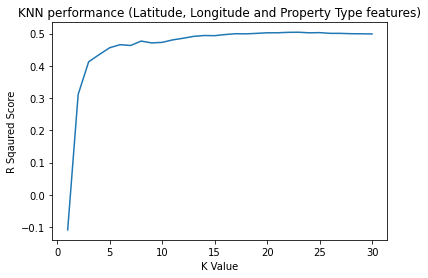

In [736]:
# KNN using longitude, latitude, and property size
knn_df2 = properties_df[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Price']]
knn_df2 = knn_df2.dropna()
knn_df2 = knn_df2.sample(frac=1)
# KNN2 
knn_x2 = knn_df2[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced']]
knn_y2 = knn_df2['Price']

scores = []
for k in range(1, 31):
    knn2 = KNeighborsRegressor(n_neighbors=k)
    y_pred2 = cross_val_predict(knn2, knn_x2, knn_y2, cv=3)
    scores.append(r2_score(knn_y2, y_pred2))

# plot how the performance evolves with the value of K
plt.xlabel("K Value")
plt.ylabel("R Sqaured Score")
plt.title("KNN performance (Latitude, Longitude and Property Type features)")
plt.plot(range(1, 31),scores)

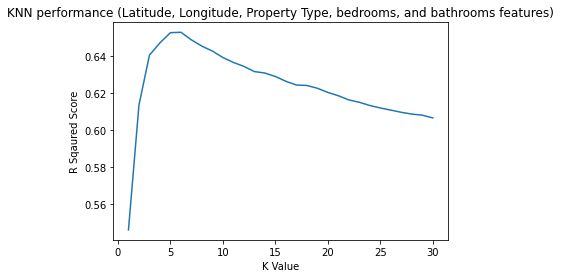

In [43]:
# That's a clear improvement, so now let's have a look at when you include bedrooms and bathrooms in the KNN
knn_df3 = properties_df[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', 'Bathrooms',
                         'Price']]
knn_df3 = knn_df3.dropna()
knn_df3 = knn_df3.sample(frac=1)
knn_x3 = knn_df3[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', "Bathrooms"]]
knn_y3 = knn_df3['Price']

# finding the optimal k value
import matplotlib.pyplot as plt
scores = []
for k in range(1, 31):
    knn3 = KNeighborsRegressor(n_neighbors=k)
    y_pred3 = cross_val_predict(knn3, knn_x3, knn_y3, cv=3)
    scores.append(r2_score(knn_y3, y_pred3))

# plot how the performance evolves with the value of K
plt.xlabel("K Value")
plt.ylabel("R Sqaured Score")
plt.title("KNN performance (Latitude, Longitude, Property Type, bedrooms, and bathrooms features)")
plt.plot(range(1, 31),scores)

In [76]:
# This is an even larger improvement. So, this is what we want to use for the local similar prices (KNN).
# Now that I've identified the optimal value of K, run the KNN algorithm again with this value of K and store the 
# predictions in a variable to be used in the regression
knn_df3 = properties_df[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', 'Bathrooms',
                         'Price']]
knn_df3 = knn_df3.dropna()
knn_df3 = knn_df3.sample(frac=1)
x3 = knn_df3[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', "Bathrooms"]]
y3 = knn_df3['Price']

knn3 = KNeighborsRegressor(n_neighbors=6)
# Using a cross validation of 3 folds, store the predictions in a variable to be inputted in a feature in a regression 
y_pred3 = cross_val_predict(knn3, x3, y3, cv=3)
# Evaluation of the KNN2 predictions
print(r2_score(y3, y_pred3))

0.6482168161441024
122635.03079727927


In [77]:
# So, let's add the KNN predictions to our knn3 dataframe, and then after we'll want to use these KNN results
# as our local similar prices feature
knn_df3['KNN'] = y_pred3
knn_df3

,Latitude,Longitude,Detached,Flat,Semi-Detached,Terraced,Bedrooms,Bathrooms,Price,KNN
"96, Pretoria Road, London, Greater London SW16 6RN",51.422447,-0.147092,0,0,0,1,6.0,3.0,1099950,1.483071e+06
"92, Guildford Road, Croydon, Greater London CR0 2HJ",51.389732,-0.093853,0,0,1,0,2.0,1.0,335000,3.632143e+05
"Flat 36, Poulton Court, Victoria Road, London, Greater London W3 6EJ",51.522550,-0.260758,0,1,0,0,1.0,1.0,317500,2.860714e+05
"Flat 28, Priory Court, Brooksbys Walk, London, Greater London E9 6DG",51.549440,-0.042260,0,1,0,0,2.0,1.0,375000,3.511429e+05
"63, Aboyne Drive, London, Greater London SW20 0AN",51.407280,-0.243807,0,1,0,0,2.0,1.0,250000,3.590714e+05
...,...,...,...,...,...,...,...,...,...,...
"85, Rounton Road, Waltham Abbey, Essex EN9 3AP",51.688170,0.012050,0,0,0,1,2.0,2.0,295000,3.257071e+05
"9, The Ridgeway, North Harrow, Harrow, Greater London HA2 7QL",51.586863,-0.372887,0,0,1,0,4.0,1.0,850000,7.316429e+05
"87, Reedham Close, London, Greater London N17 9PX",51.587185,-0.057136,0,1,0,0,2.0,1.0,387500,3.513571e+05
"38, Albany Road, Romford, Greater London RM6 6BS",51.573857,0.145004,0,0,0,1,4.0,2.0,354000,4.035714e+05


In [85]:
# Let's use another dataframe for this regression
prop_dfknn = properties_df[:]
# create a column where the KNN predictions will exist
prop_dfknn["local_prices_knn"] = np.NaN

# Now I need to get these KNN predictions into the new dataframe
for i in knn_df3.iterrows():
    prop_dfknn.loc[i[0], "local_prices_knn"] = i[1][9]
prop_dfknn = prop_dfknn.dropna()
prop_dfknn['Size'] = pd.to_numeric(prop_dfknn['Size'])

del prop_dfknn['Local_Similar_Prices']
del prop_dfknn['Postcode_Area']
del prop_dfknn['Latitude']
del prop_dfknn['Longitude']

C:\Users\jacks\AppData\Local\Temp/ipykernel_16344/2226948541.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prop_dfknn["local_prices_knn"] = np.NaN
c:\users\jacks\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [126]:
prop_dfknn = prop_dfknn.sample(frac=1)
prop_dfknn

,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,Semi-Detached,Terraced,New_Build,Old_Build,local_prices_knn
"1, Ashley Road, Richmond, Greater London TW9 2TG",0.301890,932.000,2.0,1.0,0.722729,830000,0,0,0,1,0,1,8.448573e+05
"110, Scylla Road, London, Greater London SE15 3RZ",0.347636,626.000,2.0,1.0,4.603946,510000,0,1,0,0,0,1,5.097857e+05
"41b, Boundary Road, London, Greater London N22 6AS",0.294560,743.000,2.0,1.0,0.999973,435000,0,1,0,0,0,1,4.675714e+05
"33, Beechfield Gardens, Romford, Greater London RM7 0EJ",0.688776,815.000,3.0,1.0,2.997380,355000,0,0,0,1,0,1,3.425714e+05
"11, Guysfield Close, Rainham, Greater London RM13 7AP",1.090170,928.000,3.0,1.0,5.199829,335000,0,0,1,0,0,1,3.055000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"19a, Lewis Road, Sidcup, Greater London DA14 4NB",0.508584,555.000,2.0,1.0,2.760010,269000,0,1,0,0,0,1,2.906429e+05
"4, Waldegrove, Croydon, Greater London CR0 5JX",0.289118,1711.476,4.0,2.0,1.375415,660000,1,0,0,0,0,1,7.945714e+05
"328, Grange Road, Upper Norwood, London, Greater London SE19 3DQ",0.839751,911.000,3.0,1.0,3.699266,435000,0,0,0,1,0,1,5.171429e+05
"42, Ingham Road, London, Greater London NW6 1DE",0.502756,149.000,4.0,2.0,2.395391,1510000,0,0,0,1,0,1,1.536588e+06


In [127]:
x_knn = prop_dfknn.drop(['Price'], axis=1).values
y_knn = prop_dfknn['Price'].values
# split the data set into a training and testing set
x_train_knn,x_test_knn,y_train_knn,y_test_knn = train_test_split(x_knn,y_knn,test_size=0.3,random_state=0)
# Training the model (on the training set)
ml_knn = LinearRegression()
ml_knn.fit(x_train_knn,y_train_knn)
# Predict the test set results
y_pred_knn = ml_knn.predict(x_test_knn)
print(r2_score(y_test_knn, y_pred_knn))

print(mean_absolute_error(y_test_knn, y_pred_knn))

-7.010179223776447e-07
316020.8143679675


In [128]:
r_scores_knn = cross_val_score(ml_knn, x_knn, y_knn, cv=3, scoring=r_scorer)
print(r_scores_knn, r_scores_knn.mean())

[-6.68184715e-005 -2.80181689e+157 -7.95456190e-005] -9.33938961971848e+156


In [129]:
adj_rsq(r_scores_knn.mean(), prop_dfknn)

-9.340673099623087e+156

In [130]:
# Now let's try normalise the rows using the Z-score technique
import scipy.stats as stats
norm_data_knn = pd.DataFrame()
for column in prop_dfknn.columns:
    zscores = stats.zscore(prop_dfknn[column].values)
    if zscores.sum() == 0:
        continue
    norm_data_knn[column] = zscores
norm_data_knn = norm_data_knn.dropna(axis=1, how='all')

In [131]:
x1_norm = norm_data_knn.drop(['Price'], axis=1).values
y1_norm = norm_data_knn['Price'].values

# split the data set into a training and testing set
x1norm_train,x1norm_test,y1norm_train,y1norm_test = train_test_split(x1_norm,y1_norm,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml1_norm = LinearRegression()
ml1_norm.fit(x1norm_train,y1norm_train)
# Predict the test set results
y1norm_pred = ml1_norm.predict(x1norm_test)
# evaluate the model 
print(r2_score(y1norm_test, y1norm_pred))
print(mean_absolute_error(y1norm_test, y1norm_pred))

0.6632346970708118
0.2310899891192786


In [132]:
r_scores1_knn = cross_val_score(ml1_norm, x1_norm, y1_norm, cv=8, scoring=r_scorer)
print(r_scores1_knn, r_scores1_knn.mean())

[ 7.05361809e-01  6.80241844e-01  6.28617997e-01  6.45889885e-01
 -5.99995051e+24  6.27379307e-01  6.92670164e-01  6.78663847e-01] -7.499938132282e+23


In [133]:
adj_rsq(r_scores1_knn.mean(), norm_data_knn)

-7.500968822752207e+23

In [134]:
# Here is the results
simp_df = prop_dfknn[['Bedrooms', 'Bathrooms', 'Price', "local_prices_knn"]]
# now lets remove some of the rows
x_simp = simp_df.drop(['Price'], axis=1).values
y_simp = simp_df['Price'].values
x_train,x_test,y_train,y_test = train_test_split(x_simp,y_simp,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml_simp = LinearRegression()
ml_simp.fit(x_train,y_train)
# Predict the test set results
y_pred = ml_simp.predict(x_test)
# evaluate the model 
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.6625581389748081
131714.81581341213


# Now let's try the dummy variable approach with the postcode areas instead of the postcode local similar prices using the medians - THIS MODEL IS NOT PERFORMED ON THE ENTIRE DATASET

In [175]:
propA = pd.DataFrame(properties)
propA = propA.T
propA.columns = ["Postcode_Area", "Latitude", "Longitude", "Property Type","Sold_Date", "Closest Station", "Size", "Bedrooms", "Bathrooms", "New Build", "Nearest OS", "Floorplan?", "Price"]
# Set the null values to numpy  NaN values
propA = propA.replace("NA", np.NaN)
propA = propA.replace("Na", np.NaN)
propA = propA.replace("na", np.NaN)
del propA['Floorplan?']
del propA['Sold_Date']

# Create the dummy variables
property_type_dummies = pd.get_dummies(propA['Property Type'])
build_type_dummies = pd.get_dummies(propA['New Build'])
postcode_dummies = pd.get_dummies(propA['Postcode_Area'])


# Now you need to add these to the dataframe
propA = pd.merge(propA, property_type_dummies, left_index=True, right_index=True)
propA = pd.merge(propA, build_type_dummies, left_index=True, right_index=True)
propA = pd.merge(propA, postcode_dummies, left_index=True, right_index=True)

del propA['Property Type']
del propA['New Build']
del propA['Postcode_Area']
propA = propA.dropna()
propA = propA.sample(frac=1)

In [176]:
propA

,Latitude,Longitude,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,...,RM7,RM8,RM9,SE1,SE10,SE16,SE18,SE2,SE8,SE9
"41, Morecambe Close, London, Greater London E1 4NH",51.519856,-0.046781,0.142014,613.5480,1.0,1.0,1.211445,325000,0,1,...,0,0,0,0,0,0,0,0,0,0
"20, Shandy Street, London, Greater London E1 4LX",51.520749,-0.043099,0.165393,1067.5646,4.0,1.0,0.956575,620000,0,0,...,0,0,0,0,0,0,0,0,0,0
"112, Southview Drive, Upminster, Greater London RM14 2LL",51.552733,0.238624,0.429978,246.0000,3.0,2.0,3.352957,825000,1,0,...,0,0,0,0,0,0,0,0,0,0
"54, Corporation Street, London, Greater London E15 3HD",51.531183,0.013499,0.192004,853.0000,2.0,1.0,1.633686,433500,0,0,...,0,0,0,0,0,0,0,0,0,0
"5, Candover Road, Hornchurch, Greater London RM12 4TY",51.563306,0.201744,0.882970,797.0000,3.0,1.0,1.777351,390000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"208, Gurney Close, Barking, Greater London IG11 8JZ",51.543088,0.070043,0.563350,883.0000,3.0,1.0,3.108355,355000,0,0,...,0,0,0,0,0,0,0,0,0,0
"12, Chatteris Avenue, Romford, Greater London RM3 8JX",51.601308,0.219493,0.865234,947.0000,3.0,1.0,2.651894,343000,0,0,...,0,0,0,0,0,0,0,0,0,0
"9, Chestnut Avenue, Hornchurch, Greater London RM12 4HW",51.559200,0.189330,0.752133,1327.0000,3.0,1.0,2.613162,395000,0,0,...,0,0,0,0,0,0,0,0,0,0
"Flat 29, Chicksand House, Chicksand Street, London, Greater London E1 5LH",51.518902,-0.068948,0.294958,639.0000,3.0,1.0,1.694831,450000,0,1,...,0,0,0,0,0,0,0,0,0,0


In [177]:
# Train and test this model
xA = propA.drop(['Price'], axis=1).values
yA = propA['Price'].values

# split the data set into a training and testing set
x_trainA,x_testA,y_trainA,y_testA = train_test_split(xA,yA,test_size=0.3,random_state=0)

# Training the model (on the training set)
mlA = LinearRegression()
mlA.fit(x_trainA,y_trainA)
# Predict the test set results
y_predA = mlA.predict(x_testA)
# evaluate the model 

print(r2_score(y_testA, y_predA))
print(mean_absolute_error(y_testA, y_predA))

0.5616741378173753
90965.3154108892


In [178]:
# Perform a 3-fold cross validation
r_scoresA = cross_val_score(mlA, xA, yA, cv=3, scoring=r_scorer)
print(r_scoresA, r_scoresA.mean())

[0.60574867 0.56475438 0.54508025] 0.5718610997329522


In [229]:
# Find the adjusted R-squared
adj_rsq(r_scoresA.mean(), propA)

0.5693933342204012

In [ ]:
# You NEED TO NORMALISE THE DATA JUST LIKE YOU DID ABOVE

# This model has the weakest level of performance

# Now let's use the Postcode Dummies and the KNN to represent our local similar prices in our MLR - This model is not performed on the entire dataset.

In [179]:
propA_knn = pd.DataFrame(properties)
propA_knn = propA_knn.T
propA_knn.columns = ["Postcode_Area", "Latitude", "Longitude", "Property Type","Sold_Date", "Closest Station", "Size", "Bedrooms", "Bathrooms", "New Build", "Nearest OS", "Floorplan?", "Price"]
# Set the null values to numpy  NaN values
propA_knn = propA_knn.replace("NA", np.NaN)
propA_knn = propA_knn.replace("Na", np.NaN)
propA_knn = propA_knn.replace("na", np.NaN)
del propA_knn['Floorplan?']
del propA_knn['Sold_Date']

property_type_dummies = pd.get_dummies(propA_knn['Property Type'])
build_type_dummies = pd.get_dummies(propA_knn['New Build'])
postcode_dummies = pd.get_dummies(propA_knn['Postcode_Area'])

# Now you need to add these to the dataframe
propA_knn = pd.merge(propA_knn, property_type_dummies, left_index=True, right_index=True)
propA_knn = pd.merge(propA_knn, build_type_dummies, left_index=True, right_index=True)
propA_knn = pd.merge(propA_knn, postcode_dummies, left_index=True, right_index=True)

del propA_knn['Property Type']
del propA_knn['New Build']
del propA_knn['Postcode_Area']

propA_knn = propA_knn.sample(frac=1)

In [181]:
# The KNN 
knn_A = propA_knn[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', 'Bathrooms', 'Price']]
knn_A = knn_A.dropna()
xA = knn_A[['Latitude', "Longitude", 'Detached', 'Flat', 'Semi-Detached', 'Terraced', 'Bedrooms', "Bathrooms"]]
yA = knn_A['Price']

knnA = KNeighborsRegressor(n_neighbors=8)
# Using a cross validation of 5 folds
y_predA = cross_val_predict(knnA, xA, yA, cv=3)
# Evaluation of the KNN predictions
print(r2_score(yA, y_predA))

0.6622937150057867
65727.19851945218


In [182]:
knn_A['KNN'] = y_predA
# Let's use another dataframe for this regression
propA_knn = propA[:]
propA_knn["local_prices_knn"] = np.NaN

# Now I need to get these median values into the dataframe
for i in knn_A.iterrows():
    propA_knn.loc[i[0], "local_prices_knn"] = i[1][9]

propA_knn = propA_knn.dropna()

C:\Users\jacks\AppData\Local\Temp/ipykernel_45692/1918566775.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propA_knn["local_prices_knn"] = np.NaN
C:\Users\jacks\AppData\Local\Temp/ipykernel_45692/1918566775.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  propA_knn.loc[i[0], "local_prices_knn"] = i[1][9]


In [183]:
propA_knn

,Latitude,Longitude,Closest Station,Size,Bedrooms,Bathrooms,Nearest OS,Price,Detached,Flat,...,RM8,RM9,SE1,SE10,SE16,SE18,SE2,SE8,SE9,local_prices_knn
"41, Morecambe Close, London, Greater London E1 4NH",51.519856,-0.046781,0.142014,613.5480,1.0,1.0,1.211445,325000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,379375.000
"20, Shandy Street, London, Greater London E1 4LX",51.520749,-0.043099,0.165393,1067.5646,4.0,1.0,0.956575,620000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,740372.500
"112, Southview Drive, Upminster, Greater London RM14 2LL",51.552733,0.238624,0.429978,246.0000,3.0,2.0,3.352957,825000.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671875.000
"54, Corporation Street, London, Greater London E15 3HD",51.531183,0.013499,0.192004,853.0000,2.0,1.0,1.633686,433500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,399312.500
"5, Candover Road, Hornchurch, Greater London RM12 4TY",51.563306,0.201744,0.882970,797.0000,3.0,1.0,1.777351,390000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,431125.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"208, Gurney Close, Barking, Greater London IG11 8JZ",51.543088,0.070043,0.563350,883.0000,3.0,1.0,3.108355,355000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,381062.500
"12, Chatteris Avenue, Romford, Greater London RM3 8JX",51.601308,0.219493,0.865234,947.0000,3.0,1.0,2.651894,343000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,343436.625
"9, Chestnut Avenue, Hornchurch, Greater London RM12 4HW",51.559200,0.189330,0.752133,1327.0000,3.0,1.0,2.613162,395000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376750.000
"Flat 29, Chicksand House, Chicksand Street, London, Greater London E1 5LH",51.518902,-0.068948,0.294958,639.0000,3.0,1.0,1.694831,450000.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,359375.000


In [184]:
xA_knn = propA_knn.drop(['Price'], axis=1).values
yA_knn = propA_knn['Price'].values
# split the data set into a training and testing set
xA_train_knn,xA_test_knn,yA_train_knn,yA_test_knn = train_test_split(xA_knn,yA_knn,test_size=0.3,random_state=0)
# Training the model (on the training set)
mlA_knn = LinearRegression()
mlA_knn.fit(xA_train_knn,yA_train_knn)
# Predict the test set results
yA_pred_knn = mlA_knn.predict(xA_test_knn)
print(r2_score(yA_test_knn, yA_pred_knn))

print(mean_absolute_error(yA_test_knn, yA_pred_knn))

0.6722968527297821
72444.59241435747


In [185]:
r_scoresA_knn = cross_val_score(mlA_knn, xA_knn, yA_knn, cv=3, scoring=r_scorer)
print(r_scoresA_knn, r_scoresA_knn.mean())

[0.7162497  0.65825266 0.6452323 ] 0.6732448906915723


In [230]:
adj_rsq(r_scoresA_knn.mean(), propA_knn)

0.6713332200873416

In [187]:
# Now lets normalise the data 
# Now let's try normalise the rows using the Z-score technique
import scipy.stats as stats
norm_data_Aknn = pd.DataFrame()
for column in propA_knn.columns:
    zscores = stats.zscore(propA_knn[column].values)
    if zscores.sum() == 0:
        continue
    norm_data_Aknn[column] = zscores
norm_data_Aknn = norm_data_Aknn.dropna(axis=1, how='all')

In [232]:
x1_norm = norm_data_Aknn.drop(['Price'], axis=1).values
y1_norm = norm_data_Aknn['Price'].values

# split the data set into a training and testing set
x1norm_train,x1norm_test,y1norm_train,y1norm_test = train_test_split(x1_norm,y1_norm,test_size=0.3,random_state=0)

# Training the model (on the training set)
ml1A_norm = LinearRegression()
ml1A_norm.fit(x1norm_train,y1norm_train)
# Predict the test set results
y1norm_pred = ml1A_norm.predict(x1norm_test)
# evaluate the model 
print(r2_score(y1norm_test, y1norm_pred))

0.671808538107534


In [234]:
r_scoresA_knn = cross_val_score(ml1A_norm, x1_norm, y1_norm, cv=3, scoring=r_scorer)
print(r_scoresA_knn, r_scoresA_knn.mean())

[0.71605558 0.63587881 0.64487782] 0.6656040705781868


In [235]:
adj_rsq(r_scoresA_knn.mean(), norm_data_Aknn)

0.6638212390686716